In [1]:
%load_ext zipline
%load_ext dotenv
%dotenv
%run helpers.py

## MLflow 5 minute Tracking Quickstart

This notebook demonstrates using a local MLflow Tracking Server to log, register, and then load a model as a generic Python Function (pyfunc) to perform inference on a Pandas DataFrame.

Throughout this notebook, we'll be using the MLflow fluent API to perform all interactions with the MLflow Tracking Server.

In [2]:
import mlflow
from mlflow.models import infer_signature

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Set the MLflow Tracking URI 

Depending on where you are running this notebook, your configuration may vary for how you initialize the interface with the MLflow Tracking Server. 

For this example, we're using a locally running tracking server, but other options are available (The easiest is to use the free managed service within [Databricks Community Edition](https://community.cloud.databricks.com/)). 

Please see [the guide to running notebooks here](https://www.mlflow.org/docs/latest/getting-started/running-notebooks/index.html) for more information on setting the tracking server uri and configuring access to either managed or self-managed MLflow tracking servers.

In [3]:
# NOTE: review the links mentioned above for guidance on connecting to a managed tracking server, such as the free Databricks Community Edition

mlflow.set_tracking_uri(uri=os.environ['MLFLOW_TRACKING_URI'])

In [4]:
mlflow.log_artifact(processed_path('experiment_1.html'))

FileNotFoundError: [Errno 2] No such file or directory: '/home/cest/Workspace/playground/evolufy/data/processed/experiment_1.html'

## Load training data and train a simple model

For our quickstart, we're going to be using the familiar iris dataset that is included in scikit-learn. Following the split of the data, we're going to train a simple logistic regression classifier on the training data and calculate some error metrics on our holdout test data. 

Note that the only MLflow-related activities in this portion are around the fact that we're using a `param` dictionary to supply our model's hyperparameters; this is to make logging these settings easier when we're ready to log our model and its associated metadata.

In [4]:
# Load the Iris dataset
X, y = datasets.load_iris(return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model hyperparameters
params = {"solver": "lbfgs", "max_iter": 1000, "multi_class": "auto", "random_state": 8888}

# Train the model
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate accuracy as a target loss metric
accuracy = accuracy_score(y_test, y_pred)

## Define an MLflow Experiment

In order to group any distinct runs of a particular project or idea together, we can define an Experiment that will group each iteration (runs) together. 
Defining a unique name that is relevant to what we're working on helps with organization and reduces the amount of work (searching) to find our runs later on. 

## Log the model, hyperparameters, and loss metrics to MLflow.

In order to record our model and the hyperparameters that were used when fitting the model, as well as the metrics associated with validating the fit model upon holdout data, we initiate a run context, as shown below. Within the scope of that context, any fluent API that we call (such as `mlflow.log_params()` or `mlflow.sklearn.log_model()`) will be associated and logged together to the same run. 

In [5]:
mlflow.set_experiment("Zipline Experiment 1")

2024/01/13 21:22:15 INFO mlflow.tracking.fluent: Experiment with name 'Zipline Experiment 1' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/f1bbe06631ca463bb134a9483104d766', creation_time=1705209735353, experiment_id='1', last_update_time=1705209735353, lifecycle_stage='active', name='Zipline Experiment 1', tags={}>

In [15]:
import pandas as pd

results = pd.read_pickle('results.pickle')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

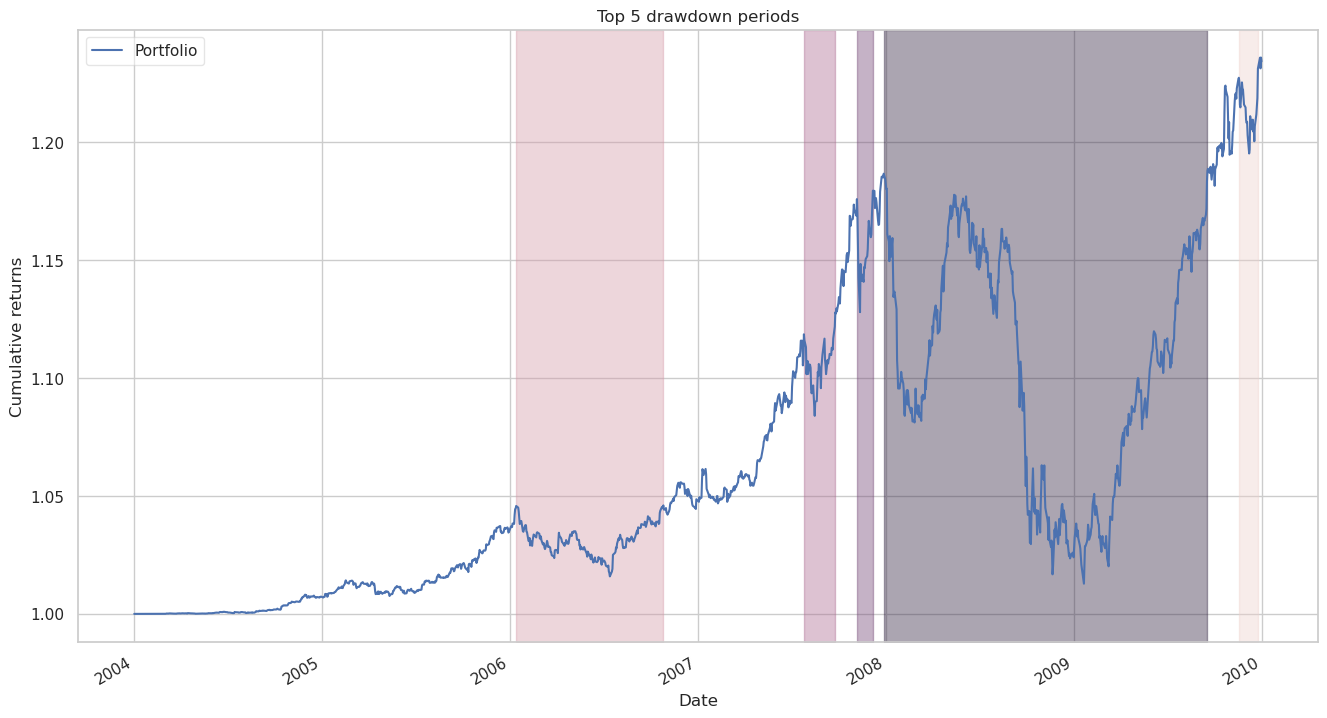

In [16]:
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date');


/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/pyfolio/plotting.py:666: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.537%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/pyfolio/plotting.py:666: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.592%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/pyfolio/plotting.py:666: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.571%' has dtype incompatible with float64, please explici

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.65,2007-12-28,2009-01-20,2009-09-17,450
1,4.07,2007-11-06,2007-11-12,2007-12-07,24
2,3.09,2007-07-26,2007-08-16,2007-09-24,43
3,2.85,2006-01-13,2006-07-14,2006-10-26,205
4,2.61,2009-11-17,2009-12-07,2009-12-24,28


/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/pyfolio/plotting.py:844: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/pyfolio/plotting.py:844: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ces

Stress Events,mean,min,max
Lehman,-0.15%,-3.13%,1.18%
Aug07,0.03%,-0.82%,0.80%
Mar08,0.14%,-0.58%,0.95%
Sept08,-0.36%,-3.13%,1.18%
2009Q1,0.02%,-0.70%,0.85%
2009Q2,0.12%,-0.77%,1.26%
Low Volatility Bull Market,0.01%,-1.03%,0.93%
GFC Crash,-0.01%,-3.13%,1.93%
Recovery,0.08%,-1.14%,1.30%


Top 10 long positions of all time,max
sid,
AAPL,30.81%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
AAPL,30.81%


/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/pyfolio/pos.py:100: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  longs = expos.where(expos.applymap(lambda x: x > 0))
/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/pyfolio/pos.py:101: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  shorts = expos.where(expos.applymap(lambda x: x < 0))
/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/pyfolio/tears.py:917: UserWarning: Fewer than 5 round-trip trades made.
               Skipping round trip tearsheet.
  warnings.warn(


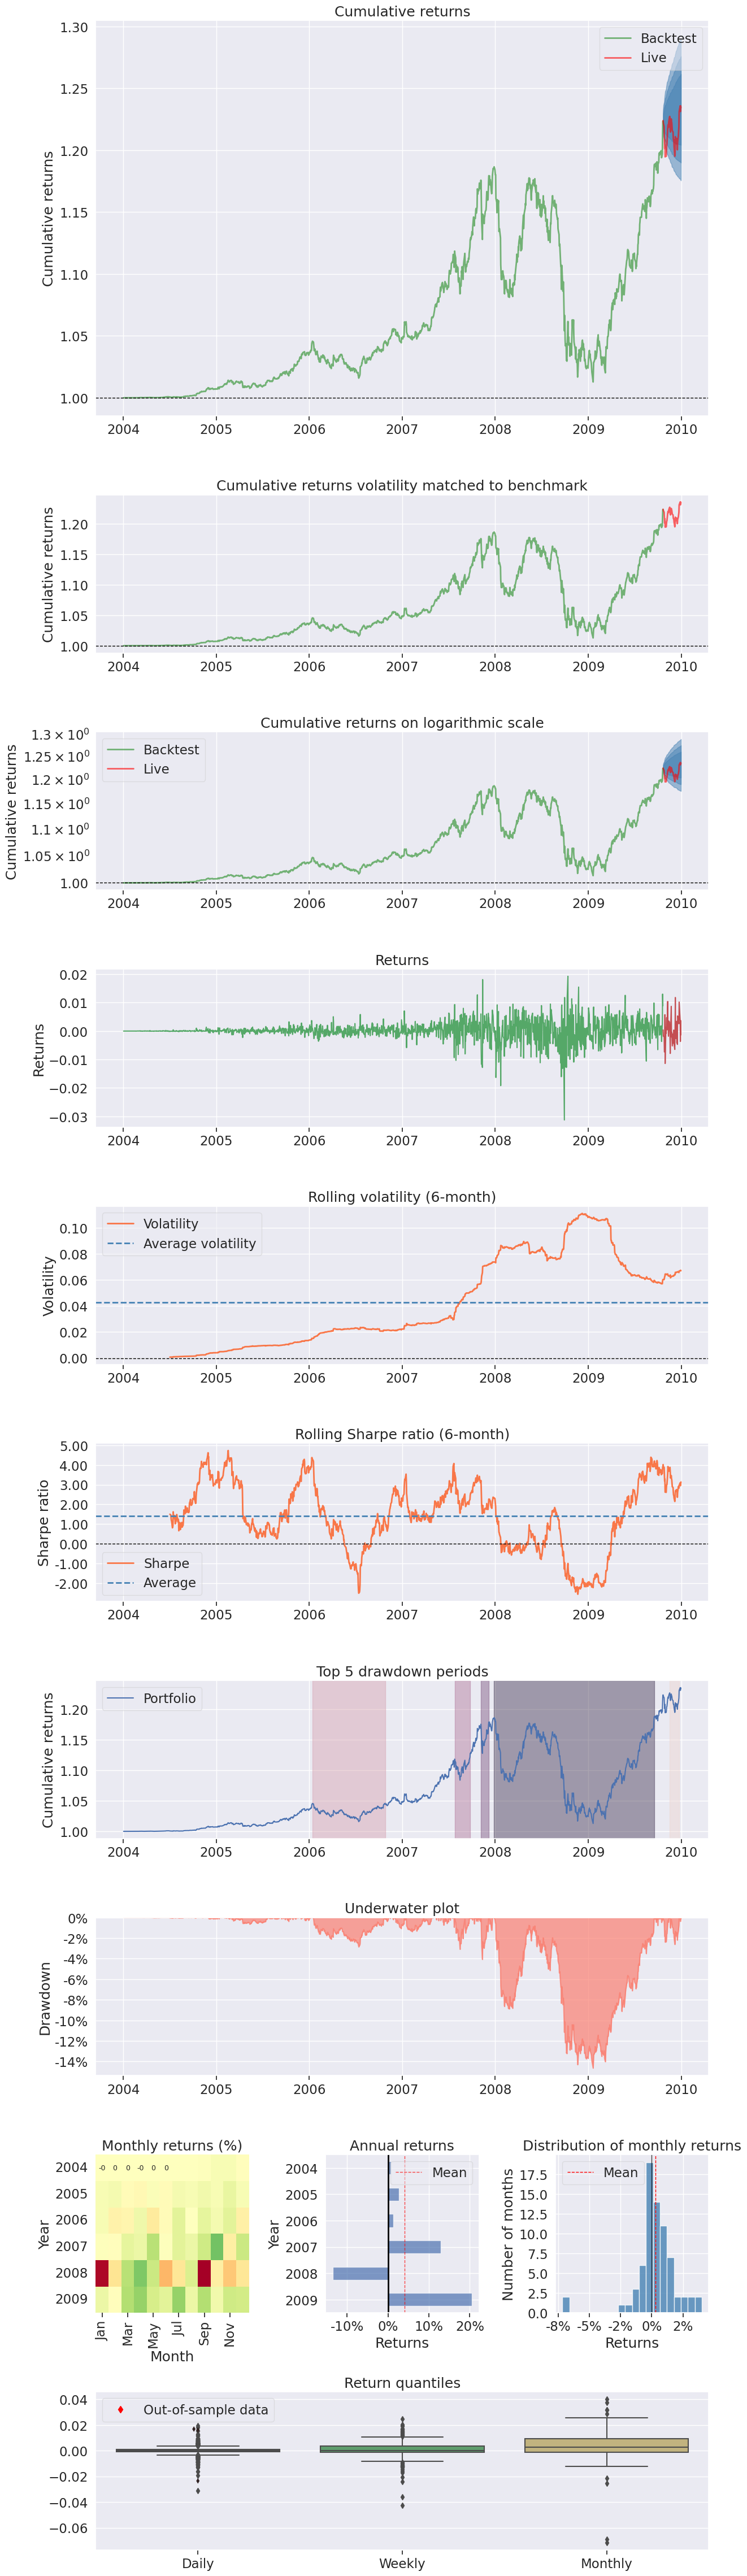

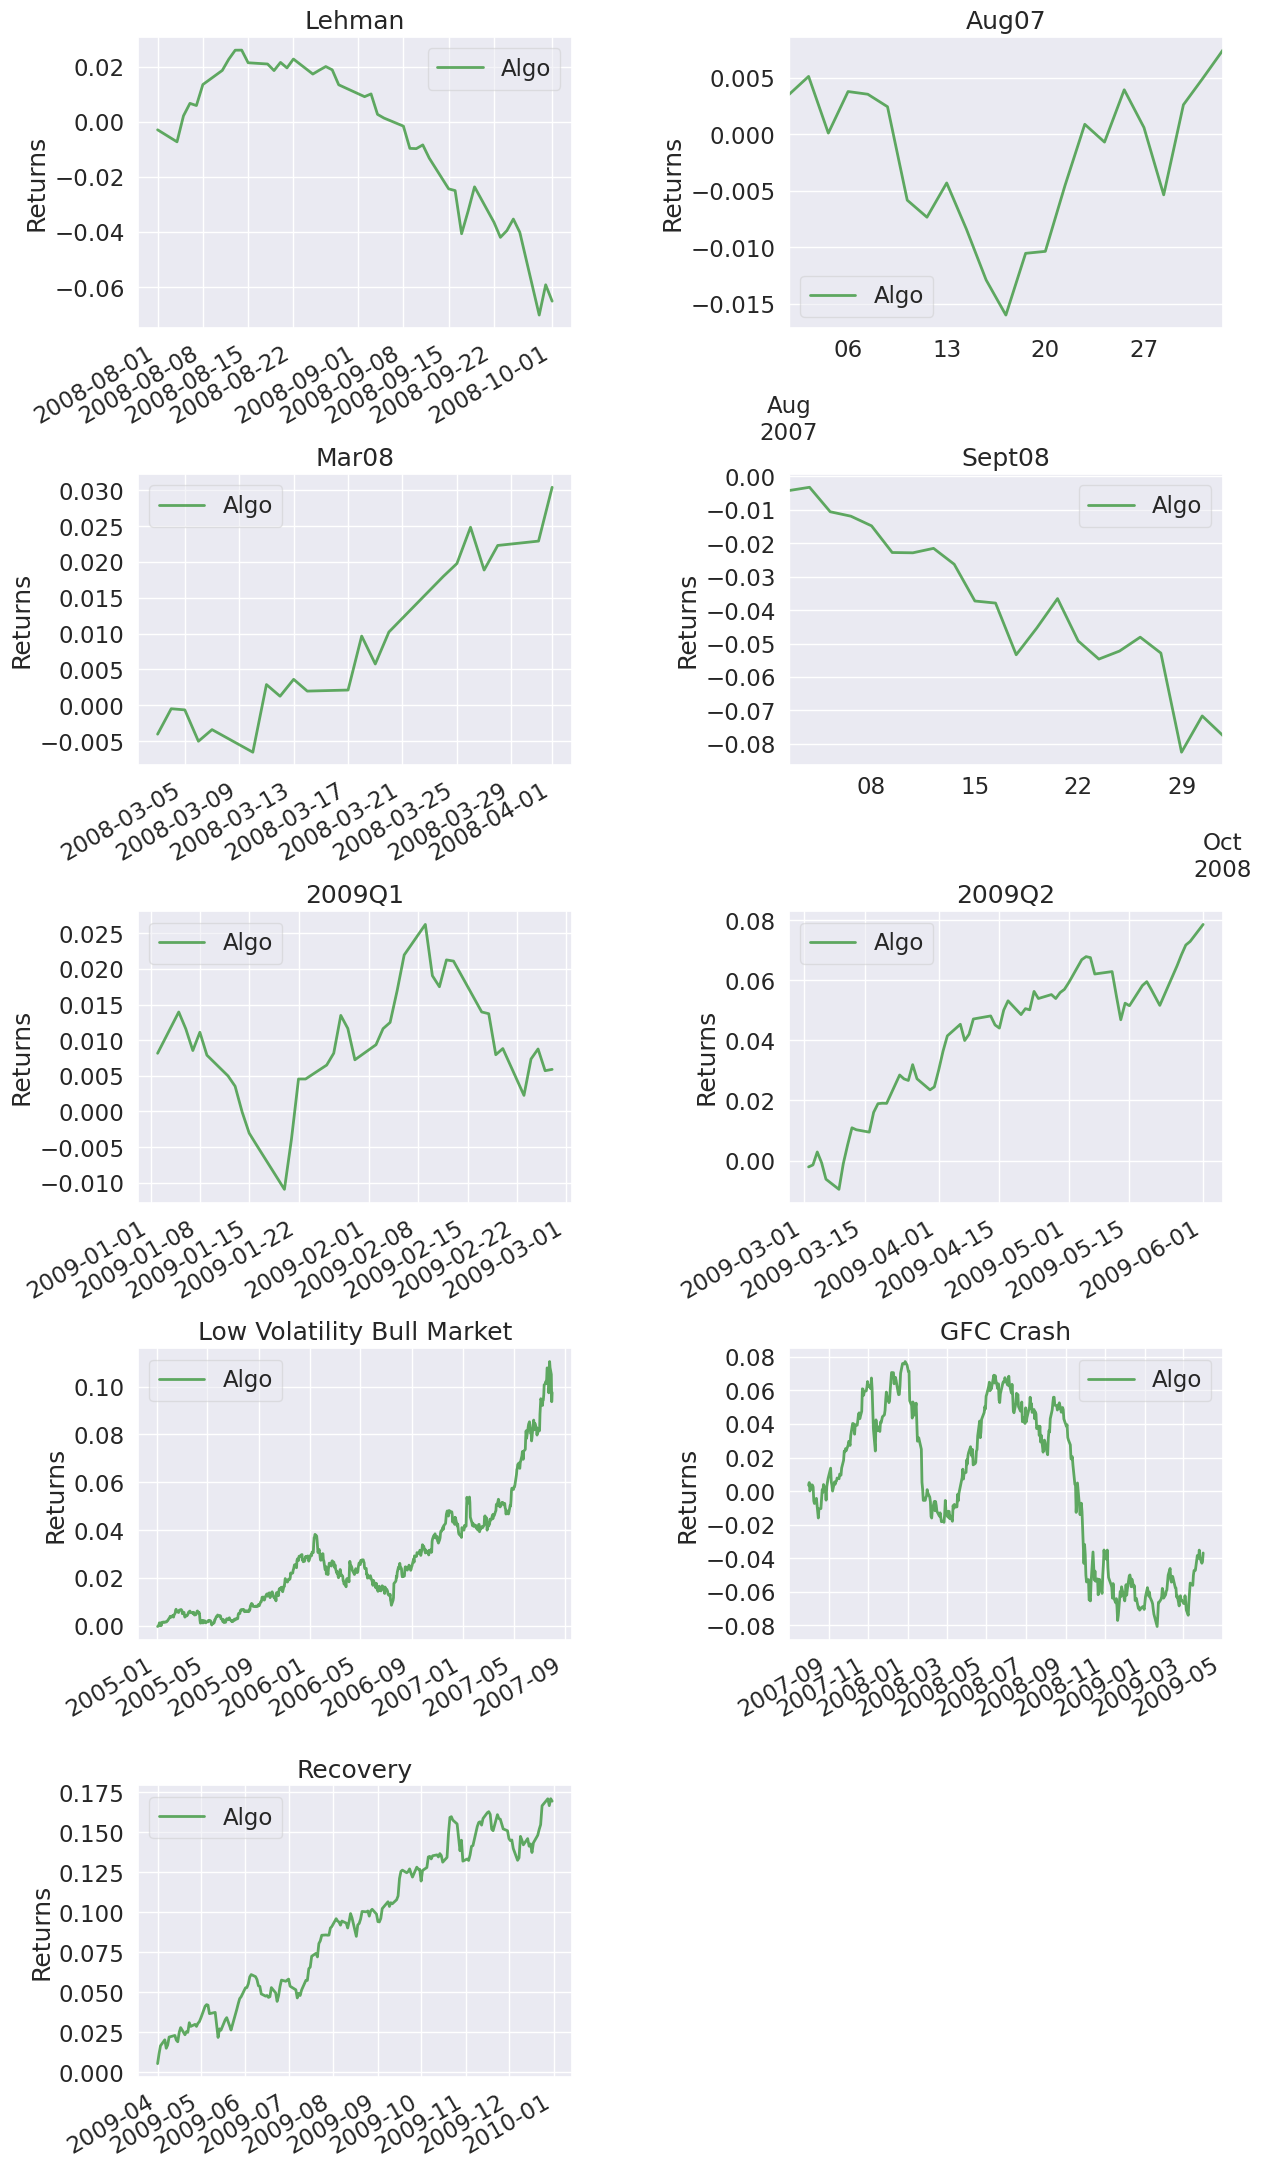

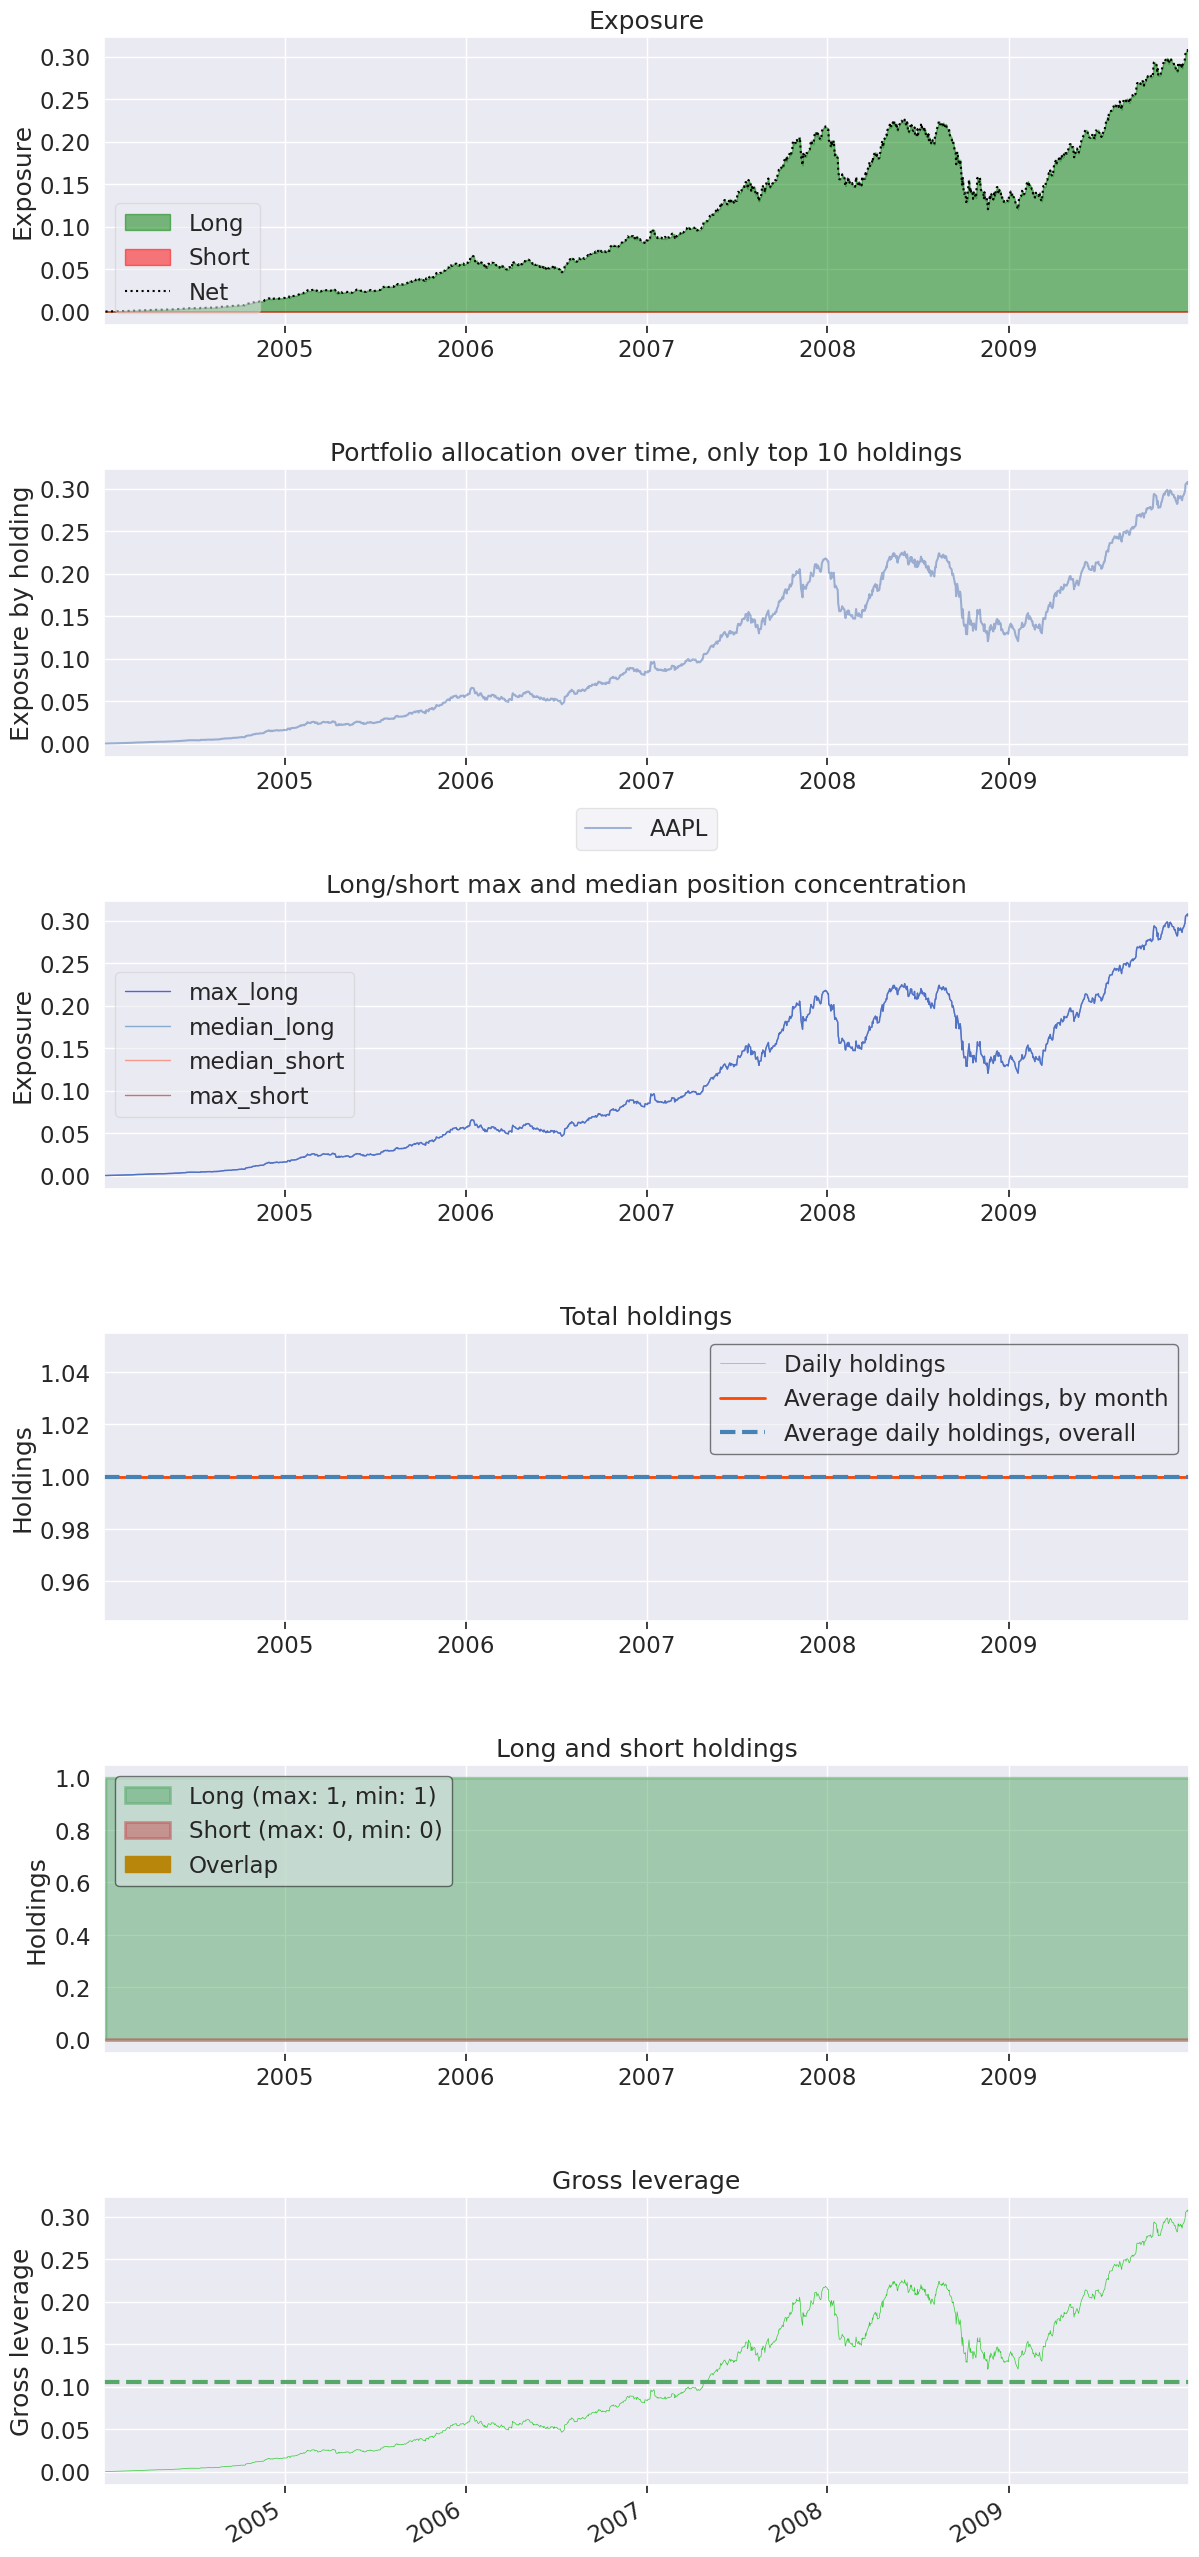

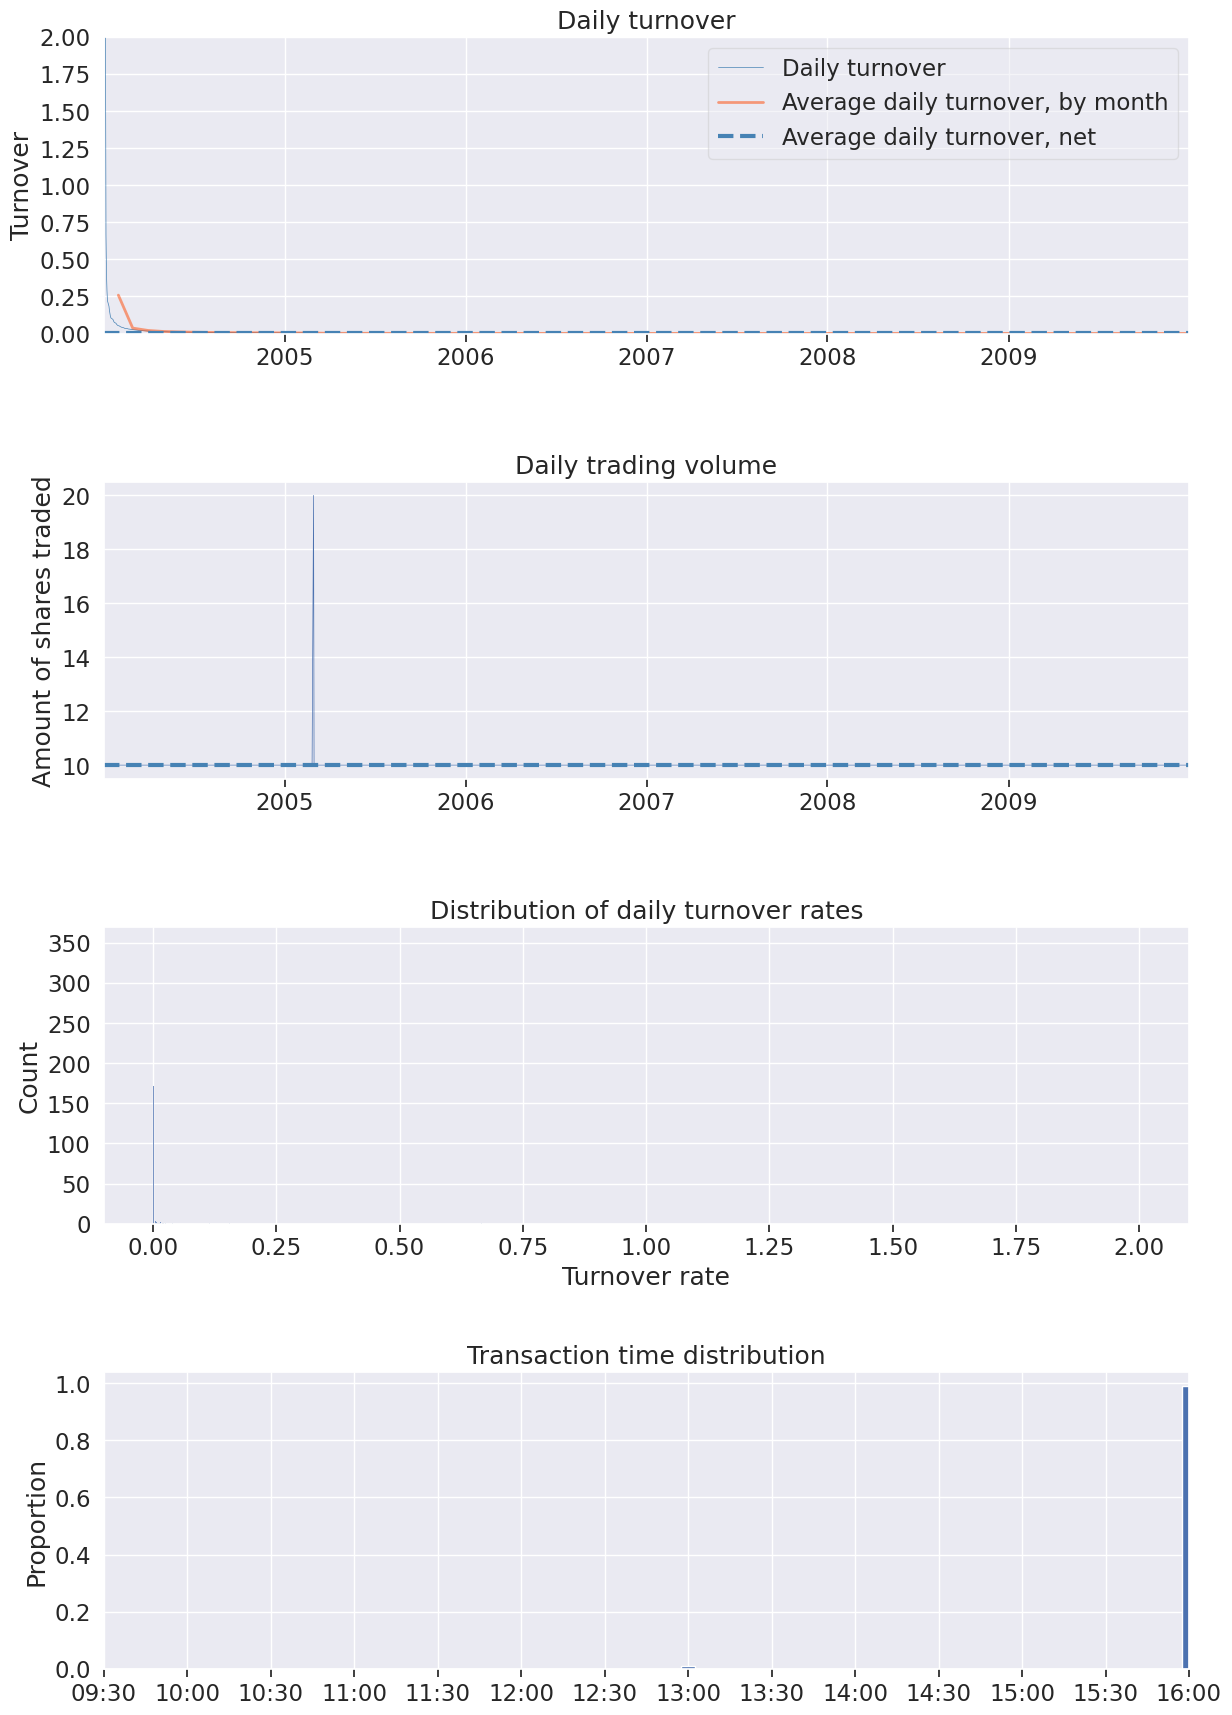

In [17]:
x = pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          live_start_date='2009-10-22', round_trips=True)

In [14]:
%%zipline --start 2004-1-1 --end 2010-1-1 -o results.pickle --no-benchmark

# Zipline trading algorithm
# Taken from zipline.examples.olmar

import numpy as np

from zipline.finance import commission, slippage
from zipline.api import order, record,symbol


def initialize(context):
        context.asset = symbol('AAPL')

def handle_data(context, data):
        order(symbol('AAPL'), 10)
        record(AAPL=data.current(symbol('AAPL'), "price"))



/home/cest/.conda/envs/evolufy/lib/python3.10/site-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns


INFO:Performance:after split: asset: Equity(8 [AAPL]), amount: 5780, cost_basis: 20.46, last_sale_price: 88.99
INFO:Performance:returning cash: 0.0
INFO:zipline.finance.metrics.tracker:Simulated 1511 trading days
 first open: 2004-01-02 14:30:00+00:00
 last close: 2009-12-31 21:00:00+00:00


,period_open,period_close,ending_exposure,long_exposure,positions,short_value,shorts_count,pnl,longs_count,transactions,orders,starting_cash,capital_used,ending_value,starting_exposure,ending_cash,returns,portfolio_value,net_leverage,gross_leverage,short_exposure,long_value,starting_value,AAPL,trading_days,max_leverage,period_label,treasury_period_return,excess_return,sharpe,sortino,algo_volatility,alpha,beta,benchmark_period_return,benchmark_volatility,max_drawdown,algorithm_period_return
2004-01-02 21:00:00+00:00,2004-01-02 14:31:00+00:00,2004-01-02 21:00:00+00:00,0.0,0.0,[],0.0,0,0.00000,0,[],"[{'id': '1d19e8f7449c4d889c9ff489b406aef2', 'd...",1.000000e+07,0.00000,0.0,0.0,1.000000e+07,0.000000e+00,1.000000e+07,0.000000,0.000000,0.0,0.0,0.0,21.280,1,0.000000,2004-01,0.0,0.0,NaN,NaN,NaN,None,None,0.0,NaN,0.000000e+00,0.000000e+00
2004-01-05 21:00:00+00:00,2004-01-05 14:31:00+00:00,2004-01-05 21:00:00+00:00,221.7,221.7,"[{'sid': Equity(8 [AAPL]), 'amount': 10, 'cost...",0.0,0,-0.12085,1,"[{'amount': 10, 'dt': 2004-01-05 21:00:00+00:0...","[{'id': '1d19e8f7449c4d889c9ff489b406aef2', 'd...",1.000000e+07,-221.82085,221.7,0.0,9.999778e+06,-1.208500e-08,1.000000e+07,0.000022,0.000022,0.0,221.7,0.0,22.170,2,0.000022,2004-01,0.0,0.0,-11.224972,-11.224972,1.356538e-07,None,None,0.0,0.0,-1.208500e-08,-1.208500e-08
2004-01-06 21:00:00+00:00,2004-01-06 14:31:00+00:00,2004-01-06 21:00:00+00:00,441.8,441.8,"[{'sid': Equity(8 [AAPL]), 'amount': 20, 'cost...",0.0,0,-0.92045,1,"[{'amount': 10, 'dt': 2004-01-06 21:00:00+00:0...","[{'id': '8e9ffe7ca9544876b320d603f26a2aef', 'd...",9.999778e+06,-221.02045,441.8,221.7,9.999557e+06,-9.204500e-08,9.999999e+06,0.000044,0.000044,0.0,441.8,221.7,22.090,3,0.000044,2004-01,0.0,0.0,-11.015703,-10.280257,7.940410e-07,None,None,0.0,0.0,-1.041300e-07,-1.041300e-07
2004-01-07 21:00:00+00:00,2004-01-07 14:31:00+00:00,2004-01-07 21:00:00+00:00,677.7,677.7,"[{'sid': Equity(8 [AAPL]), 'amount': 30, 'cost...",0.0,0,9.87705,1,"[{'amount': 10, 'dt': 2004-01-07 21:00:00+00:0...","[{'id': 'df93ce416ef143e8b0cdb1e9d095cf40', 'd...",9.999557e+06,-226.02295,677.7,441.8,9.999331e+06,9.877051e-07,1.000001e+07,0.000068,0.000068,0.0,677.7,441.8,22.590,4,0.000068,2004-01,0.0,0.0,6.837619,75.544387,8.141025e-06,None,None,0.0,0.0,-1.041300e-07,8.835750e-07
2004-01-08 21:00:00+00:00,2004-01-08 14:31:00+00:00,2004-01-08 21:00:00+00:00,934.4,934.4,"[{'sid': Equity(8 [AAPL]), 'amount': 40, 'cost...",0.0,0,22.97320,1,"[{'amount': 10, 'dt': 2004-01-08 21:00:00+00:0...","[{'id': 'af3ca335c28f4ec98a4a316ff755476e', 'd...",9.999331e+06,-233.72680,934.4,677.7,9.999097e+06,2.297318e-06,1.000003e+07,0.000093,0.000093,0.0,934.4,677.7,23.360,5,0.000093,2004-01,0.0,0.0,9.811082,243.249969,1.634040e-05,None,None,0.0,0.0,-1.041300e-07,3.180895e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24 18:00:00+00:00,2009-12-24 14:31:00+00:00,2009-12-24 18:00:00+00:00,3754358.4,3754358.4,"[{'sid': Equity(8 [AAPL]), 'amount': 17960, 'c...",0.0,0,124571.94480,1,"[{'amount': 10, 'dt': 2009-12-24 18:00:00+00:0...","[{'id': '40d4f21cd23f4fc8a9cb2262bd41f5ce', 'd...",8.559082e+06,-2091.45520,3754358.4,3627695.0,8.556991e+06,1.022189e-02,1.231135e+07,0.304951,0.304951,0.0,3754358.4,3627695.0,209.040,1507,0.304951,2009-12,0.0,0.0,0.665518,0.938107,5.448157e-02,None,None,0.0,0.0,-1.464567e-01,2.311349e-01
2009-12-28 21:00:00+00:00,2009-12-28 14:31:00+00:00,2009-12-28 21:00:00+00:00,3802631.7,3802631.7,"[{'sid': Equity(8 [AAPL]), 'amount': 17970, 'c...",0.0,0,46156.13195,1,"[{'amount': 10, 'dt': 2009-12-28 21:00:00+00:0...","[{'id': 'a661901e6f2549b890b8e22894c8af22', 'd...",8.556991e+06,-2117.16805,3802631.7,3754358.4,8.554874e+06,3.749072e-03,1.235751e+07,0.307718,0.307718,0.0,3802631.7,3754358.4,211.610,1508,0.307718,2009-12,0.0,0.0,0.676553,0.954011,5.448343e-02,None,None,0.0,0.0,-1.464567e-01,2.357505e-01
2009-12-29 21:00:00+00:00,2009-12-

## Load our saved model as a Python Function

Although we can load our model back as a native scikit-learn format with `mlflow.sklearn.load_model()`, below we are loading the model as a generic Python Function, which is how this model would be loaded for online model serving. We can still use the `pyfunc` representation for batch use cases, though, as is shown below.

In [7]:
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

## Use our model to predict the iris class type on a Pandas DataFrame

In [8]:
predictions = loaded_model.predict(X_test)

iris_feature_names = datasets.load_iris().feature_names

# Convert X_test validation feature data to a Pandas DataFrame
result = pd.DataFrame(X_test, columns=iris_feature_names)

# Add the actual classes to the DataFrame
result["actual_class"] = y_test

# Add the model predictions to the DataFrame
result["predicted_class"] = predictions

result[:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_class,predicted_class
0,6.1,2.8,4.7,1.2,1,1
1,5.7,3.8,1.7,0.3,0,0
2,7.7,2.6,6.9,2.3,2,2
3,6.0,2.9,4.5,1.5,1,1
